In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


# **Read to The Dataset**

In [2]:
train = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
test = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
sample= pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv")

In [3]:
train.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [4]:
print(train.store_and_fwd_flag.value_counts())

store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64


# **Types Of Dataset**

In [5]:
train.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object

# **Feature Engineering**

# We want know about which columns are numerical and which columns are categorical.

In [6]:
NC = train.select_dtypes(include=['number']).columns  #NC=Numerical columns
CC = train.select_dtypes(include=['object']).columns  #CC=Catogerical Columns
print(NC)
print(CC)

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')
Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag',
       'payment_type'],
      dtype='object')


**Summary Statistics:**

* Get an overview of the dataset using descriptive statistics.
* Identify mean, median, standard deviation, min, max, etc.

In [7]:
 train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


# **Missing Values:**

In [8]:
 train.isnull().sum()    # Check for missing values

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

# >**Encoding Categorical Feature**
we have many option to change categorical feature to numerical feature.
**like:**
* OnehotEncoder
* dummy
* LabelEncoder
* replace()

# **Here we are **using LabelEncoder for Encoding Categorical Feature****

In [9]:
#Applying Encodet On Train Data
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
train['store_and_fwd_flag']=label_encoder1.fit_transform(train['store_and_fwd_flag'])
train['payment_type']=label_encoder2.fit_transform(train['payment_type'])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
print(train.store_and_fwd_flag.value_counts())

store_and_fwd_flag
0    167729
2      6077
1      1194
Name: count, dtype: int64


In [11]:
#Applying Encoder On Test Data
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
test['store_and_fwd_flag']=label_encoder1.fit_transform(test['store_and_fwd_flag'])
test['payment_type']=label_encoder2.fit_transform(test['payment_type'])

In [12]:
train.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,0,120,9,1,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,0,15,215,1,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,0,167,223,1,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,0,128,239,1,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,0,203,52,1,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


# **Removing two columns and adding one columns**
here we are Converting the datetime columns to datetime objects and **calculating the absolute diffrence between pickup and dropoff times****

# preprocessing on train data

In [13]:
import pandas as pd

# Converting the datetime columns to datetime objects
train['tpep_pickup_datetime'] = pd.to_datetime(train['tpep_pickup_datetime'])
train['tpep_dropoff_datetime'] = pd.to_datetime(train['tpep_dropoff_datetime'])

# Calculateing the absolute minute difference between pickup and dropoff times
train['minute_difference'] = abs((train['tpep_dropoff_datetime'] - train['tpep_pickup_datetime']).dt.total_seconds() / 60)

# printing the updated DataFrame
print(train[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'minute_difference']])

       tpep_pickup_datetime tpep_dropoff_datetime  minute_difference
0       2023-06-28 17:20:21   2023-06-28 16:34:45          45.600000
1       2023-06-29 23:05:01   2023-06-29 22:01:35          63.433333
2       2023-06-30 10:19:31   2023-06-30 11:13:10          53.650000
3       2023-06-29 13:23:09   2023-06-29 14:20:01          56.866667
4       2023-06-29 22:03:32   2023-06-29 22:22:22          18.833333
...                     ...                   ...                ...
174995  2023-06-30 22:50:57   2023-06-30 22:22:22          28.583333
174996  2023-06-30 13:03:33   2023-06-30 14:04:57          61.400000
174997  2023-06-29 11:03:32   2023-06-29 12:13:34          70.033333
174998  2023-06-29 19:47:17   2023-06-29 19:08:55          38.366667
174999  2023-06-30 21:26:43   2023-06-30 22:54:42          87.983333

[175000 rows x 3 columns]


# Preprocessing on test data

In [14]:
import pandas as pd

# Converting the datetime columns to datetime objects
test['tpep_pickup_datetime'] = pd.to_datetime(test['tpep_pickup_datetime'])
test['tpep_dropoff_datetime'] = pd.to_datetime(test['tpep_dropoff_datetime'])

# Calculateing the absolute minute difference between pickup and dropoff times
test['minute_difference'] = abs((test['tpep_dropoff_datetime'] - test['tpep_pickup_datetime']).dt.total_seconds() / 60)

# printing the updated DataFrame
print(test[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'minute_difference']])

      tpep_pickup_datetime tpep_dropoff_datetime  minute_difference
0      2023-06-29 00:21:20   2023-06-29 00:25:20           4.000000
1      2023-06-30 17:44:43   2023-06-30 17:53:13           8.500000
2      2023-06-29 18:17:04   2023-06-29 19:23:48          66.733333
3      2023-06-30 21:33:53   2023-06-30 21:46:20          12.450000
4      2023-06-29 14:53:54   2023-06-29 15:22:17          28.383333
...                    ...                   ...                ...
49995  2023-06-29 17:41:59   2023-06-29 18:30:36          48.616667
49996  2023-06-30 01:25:25   2023-06-30 01:10:40          14.750000
49997  2023-06-30 22:28:44   2023-06-30 21:49:37          39.116667
49998  2023-06-30 02:37:18   2023-06-30 02:10:33          26.750000
49999  2023-06-30 18:05:15   2023-06-30 17:15:16          49.983333

[50000 rows x 3 columns]


# Droping that datetime columns from both .csv

In [15]:
train=train.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)
test=test.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

In [16]:
#Checking code are exicuting or not
train.head(5)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,minute_difference
0,1,1.0,2.14,1.0,0,120,9,1,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,45.600000
1,0,1.0,2.70,1.0,0,15,215,1,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,63.433333
2,1,1.0,1.15,1.0,0,167,223,1,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,53.650000
3,0,1.0,0.40,1.0,0,128,239,1,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,56.866667
4,1,3.0,1.10,1.0,0,203,52,1,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,18.833333


# **EDA**

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
train.isnull().sum()

VendorID                    0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
minute_difference           0
dtype: int64

In [19]:
print(train.passenger_count.value_counts())
print(train.RatecodeID.value_counts())
print(train.congestion_surcharge.value_counts())
print(train.Airport_fee.value_counts())

passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64
RatecodeID
1.0     158652
2.0       7314
5.0       1036
99.0       748
3.0        727
4.0        446
Name: count, dtype: int64
congestion_surcharge
 2.5    153212
 0.0     14325
-2.5      1386
Name: count, dtype: int64
Airport_fee
 0.00    153074
 1.75     15590
-1.75       259
Name: count, dtype: int64


In [20]:
test.isnull().sum()

VendorID                    0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
minute_difference           0
dtype: int64

In [21]:
# we Separate the target variable 
X_train = train.drop(['total_amount'], axis=1)
y_train = train['total_amount']



# **Distribution of Target Variable(total_amount)**

**We are ploting QQ Plot(Quantile-Quantile Plot). The perpouse for ploting this graph is to analysis to checking normality.**

***Analysing normality is important because Knowing the normality of a dataset is important for several reasons, especially in the context of statistical analysis and hypothesis testing.****



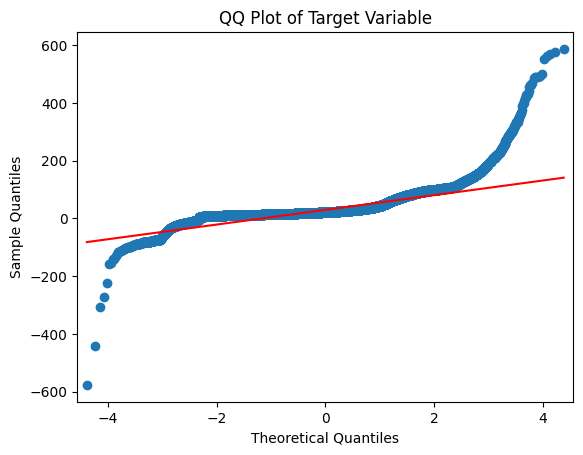

In [22]:
import statsmodels.api as sm

sm.qqplot(train['total_amount'], line='s')
plt.title('QQ Plot of Target Variable')
plt.show()


**We ploted QQ Plot(Quantile-Quantile Plot). The perpouse for ploting this graph is to analysis to checking normality.**

the points are deviating from the line, it indicates departures from normality.

**Heavy Tails:** Tails bending upward or downward may indicate heavy-tailed distributions.

**S-shaped Curve:** An S-shaped curve may suggest skewness.

**Outliers:**

Outliers on the QQ plot can also indicate departures from normality. Here tail are long so we can say that may not be consistent with a normal distribution.



/tmp/ipykernel_26/4231008052.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['total_amount'], shade=True)


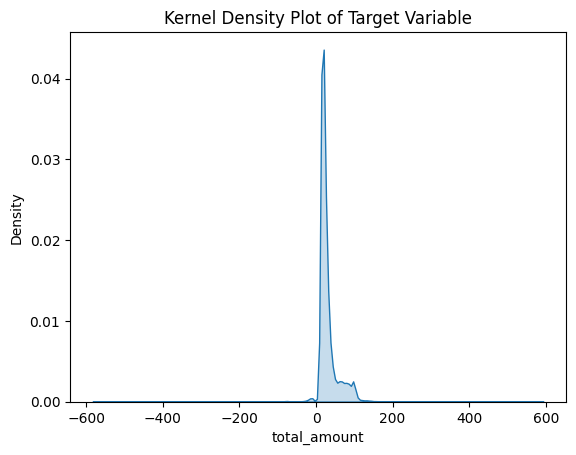

In [23]:
import seaborn as sns

sns.kdeplot(train['total_amount'], shade=True)
plt.title('Kernel Density Plot of Target Variable')
plt.xlabel('total_amount')
plt.ylabel('Density')
plt.show()


**Here we plotted a kernel density plot, we can identify patterns in the data and understand density by visually inspecting the shape of the plot. Here are some key aspects to consider when we are interpreting a kernel density plot:**

**It is Unimodal:** A single peak suggests a unimodal distribution, indicating one dominant mode or central tendency in the data.Here we can see single peak so it is ***unimodel***

**it is Positively-Skewed:** If the plot is skewed to the left (negatively skewed) or to the right (positively skewed), it indicates an asymmetry in the distribution.Here we are seeing that plot is skewed to the right so it is ***positively-skewed***

log og this data


In [24]:
X_train.shape

(175000, 15)

# **Removing Outlier**

# Removing Outlier of train data

# Removing Outlier of test data

# Calculating Co-Relation Matrix and Ploting Heatmap
**With help of these heatmap we can clearly know that how much these variable are important with each-other**

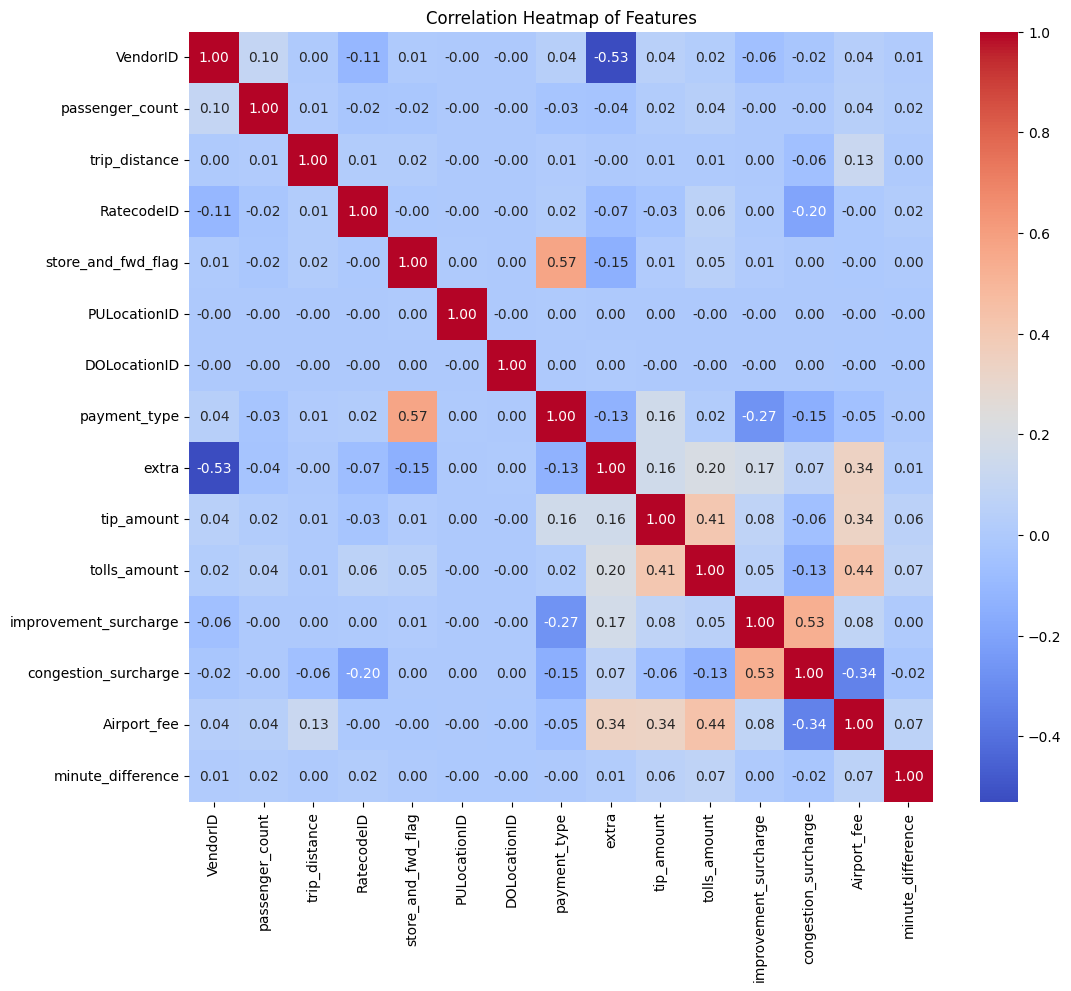

In [25]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))                                                    #deciding size of Map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')                                    #Heading of Map
plt.show()

#  **Feature Selection**
 *****with the help of this code we are trying to know about wich feature are most imortent for traget variable in the prediction.
 so this code will help to know rankwise which code is impotant******

**In feature selection process we write code to know feature importance and plote Bar chart**

**we can clearly indentify which feature is important for target variable **

**Most Important Feature:**

trip_distance---0.726841

 tip_amount---0.091192
 
 improvement_surcharge---0.086165
 
 tolls_amount---0.046685
 
 RatecodeID---0.042982
 
 extra---0.002735
 
 **Impotant:**
 
VendorID--0.000869

congestion_surcharge--0.000768

payment_type---0.000645

minute_difference---0.000459

store_and_fwd_flag---0.000287

DOLocationID---0.000198

PULocationID---0.000169

**Not Important:**

passenger_count---0.000005

Airport_fee---0.000000

 


# Spliting to train data


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Spliting the training data into a training set and a validation set
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


# PipeLine
* **scaling to the data with help of StandardScaler**
* **Imputing missing Values witth SimpleImputer and strategy will mean**

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())                    # Scale features to zero mean and unit variance
 ])

# Transformation Of Data

In [28]:
# Applying the transformations to the training data
X_train_transformed = numerical_transformer.fit_transform(X_train)

# Applying the transformations to the training and validation sets after split
X_train_split_transformed = numerical_transformer.fit_transform(X_train_split)
X_val_transformed = numerical_transformer.transform(X_val)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


# Fitting Diff. Type Of Models

In [30]:
model = GradientBoostingRegressor()
model1=LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3= xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)

# Fitting the model 
model.fit(X_train_transformed, y_train)
model1.fit(X_train_transformed, y_train)
model2.fit(X_train_transformed, y_train)
model3.fit(X_train_transformed, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Pridiction of gvjx on Train Data

# GradientBoostingRegressor

In [31]:

# Training the model on the training set
y_val_pred = model.predict(X_val_transformed)

# Evaluateing the model on the validation set
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, y_val_pred)
print(f'R^2 Score: {r2}')


Mean Squared Error: 34.433642638498696
R^2 Score: 0.948296820180285


Gradient Boosting Regressor is a powerful algorithm widely used in various regression tasks. Its ability to iteratively correct errors and build a strong predictive model makes it suitable for a wide range of applications. 

# LinearRegression

In [32]:
# Training the model on the training set
y_val_pred = model1.predict(X_val_transformed)

# Evaluateing the model on the validation set
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, y_val_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 182.57889255024114
R^2 Score: 0.7258521437329669


# RandomForestRegressor

In [33]:
# Training the model on the training set
y_val_pred = model2.predict(X_val_transformed)

# Evaluateing the model on the validation set
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, y_val_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 11.65892508527886
R^2 Score: 0.9824937632501654


Random Forests are a versatile and widely used machine learning algorithm suitable for both classification and regression tasks. They are particularly effective when the dataset has a large number of features and when interpretability is not the primary concern.

# XGBRegressor

In [34]:
# Training the model on the training set
y_val_pred = model3.predict(X_val_transformed)

# Evaluateing the model on the validation set
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, y_val_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 20.348389794829636
R^2 Score: 0.9694462631314107


XGBoost's effectiveness lies in its ability to handle complex relationships in data, manage overfitting, and provide high predictive accuracy. 

# Prediction for Test data

In [35]:
# Apply the transformations to the test data
X_test_transformed = numerical_transformer.transform(test)

# Make predictions
y_pred = model3.predict(X_test_transformed)

#predictions of y_pred for the data in test.csv
y_pred

array([34.13513 , 25.507301, 15.530304, ..., 20.41241 , 34.354618,
       17.936577], dtype=float32)

# **Hypermeter Tuning Of diff. type of Model to Optimise  its configuration**

In [36]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy.stats import randint
import xgboost as xgb


# **Diffrent Models Param Dist.**

# **APPLYING MODELS**

# GradientBoostingRegressor

# RandomForestRegressor

# XGBRegressor

# Geting the best hyperparameters for each model

# Printing best params

# Submission of Prediction

In [37]:
submission = pd.DataFrame(columns = ["ID","total_amount"])
submission["ID"] = [i for i in range(1,len(y_pred)+1)]
submission["total_amount"] = y_pred
submission.to_csv('submission.csv',index=False)
submission

,ID,total_amount
0,1,34.135132
1,2,25.507301
2,3,15.530304
3,4,15.602636
4,5,24.833763
...,...,...
49995,49996,15.668847
49996,49997,26.257338
49997,49998,20.412411
49998,49999,34.354618


# **SUMMERY**

# *Top models:*

# 1. Model Name = XGBRegressor
#    Best prediction score of this model on Test-Data = 0.94484
#    Prediction score of XGBRegressor on Train-Data = 0.969446
****
# 2. Model Name = RandomForestRegressor  (Overfitting)
#    Best prediction score of this model on Test-Data=0.9348
#    Best prediction score of this model on Train-Data = 0.9824
****
# 3. Model Name = GradientBoostingRegressor  (Overfitting)
#    Best prediction score of this model on Test-Data=0.9014
#    Best prediction score of this model on Train-Data = 0.948496


